## Реализация собственного пакета модулей для манипулирования плоскими фигурами

# #1

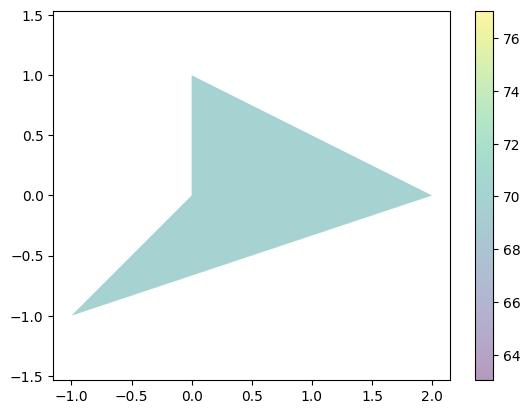

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Polygon, Wedge

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()
patches = []

# polygon = Polygon([[0,0], [0,1], [2, 0]], closed=True)
polygon = Polygon([[0,0], [0,1], [2, 0], [-1, -1]], closed=True)
patches.append(polygon)

colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(colors)
ax.add_collection(p)
fig.colorbar(p, ax=ax)

plt.axis('equal')
plt.show()

# #2

In [2]:
import math

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle, RegularPolygon
from matplotlib.axes import Axes
from matplotlib.collections import PatchCollection
from itertools import islice
import numpy as np


def combined_generator(*generators):
    for gen in generators:
        for item in gen:
            yield item


def draw_polygons(patches=None, draw_axes=True):
    if patches is None:
        patches = []
    fig, ax = plt.subplots()
    p = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.4)
    ax.add_collection(p)
    plt.axis('equal')
    if draw_axes:
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
    plt.show()

def gen_rectangle(start=(0, 0), step=(10, 0), num_shapes=1):
    x, y = start
    size = 6  # side
    result = []
    for i in range(num_shapes):
        # yield Rectangle((x, y), size, size, color='blue')
        result.append(Polygon(((x, y - size/2), (size + x, y - size/2), (size + x, size + y - size/2), (x, size + y - size/2)), closed=True, color='blue'))
        x += step[0]
        y += step[1]
    return result


def gen_triangle(start=(0, 0), step=(10, 0), direction=1, num_shapes=1):
    x, y = start
    size = 3.5
    result = []
    for i in range(num_shapes):
        result.append(Polygon(((x, y - size*direction*0.75), (direction*size + x, y + direction*size*1.5 - size*direction*0.75), (2 * direction*size + x, y - size*direction*0.75)), closed=True, color='blue'))
        x += step[0]
        y += step[1]
    return result

def gen_hexagon(start=(0, 0), step=(10, 0), num_shapes=1):
    x, y = start
    result = []
    for i in range(num_shapes):
        result.append(RegularPolygon((x, y), numVertices=6, radius=3, alpha=0.2, edgecolor='k'))
        x += step[0]
        y += step[1]
    return result

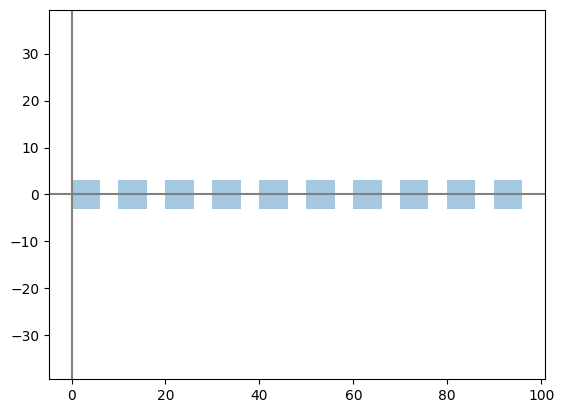

In [3]:
draw_polygons(gen_rectangle(num_shapes=10), draw_axes=True)

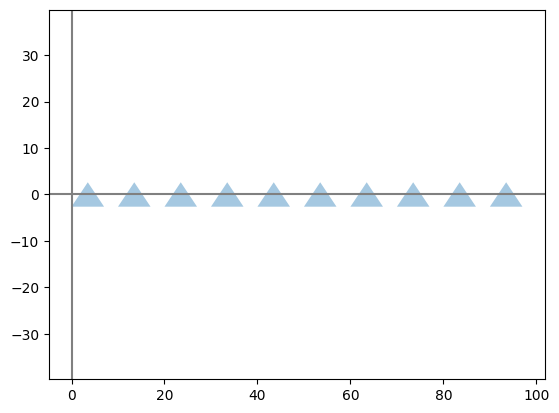

In [4]:
draw_polygons(gen_triangle(num_shapes=10), draw_axes=True)

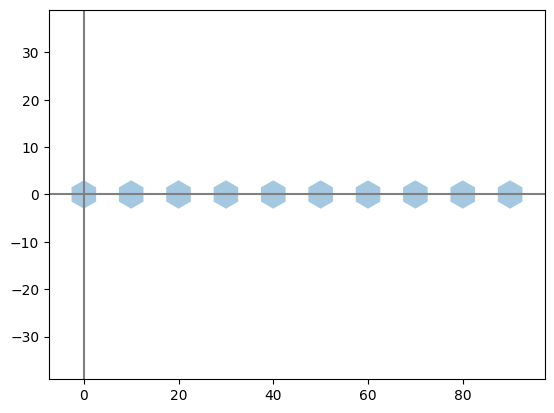

In [5]:
draw_polygons(gen_hexagon(num_shapes=10), draw_axes=True)

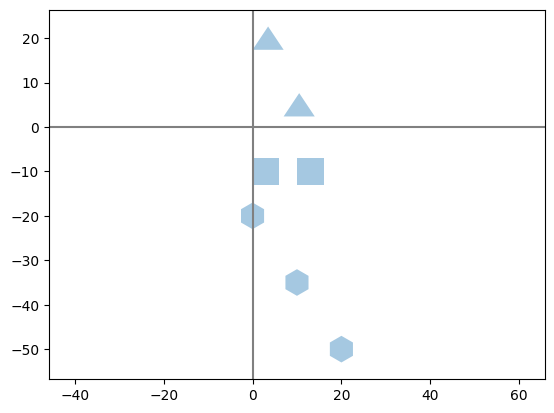

In [6]:
draw_polygons(
              gen_rectangle(start=(0, -10), num_shapes=2) +
              gen_triangle(start=(0, 20), step=(7, -15), num_shapes=2) +
              gen_hexagon(start=(0, -20), step=(10, -15), num_shapes=3)
             )

# #3

In [7]:
def tr_translate(polygons, dx=0, dy=0):
    for polygon in polygons:
        vertices = polygon.get_xy()
        new_vertices = [(x + dx, y + dy) for x, y in vertices]
        polygon.set_xy(new_vertices)
    return polygons

def tr_rotate(polygons, angle, origin=(0, 0)):
    for polygon in polygons:
        vertices = polygon.get_xy()
        ox, oy = origin
        new_vertices = []
        for x, y in vertices:
            x -= ox
            y -= oy
            new_x = x * math.cos(angle) - y * math.sin(angle) + ox
            new_y = x * math.sin(angle) + y * math.cos(angle) + oy
            new_vertices.append((new_x, new_y))
        polygon.set_xy(new_vertices)
    return polygons

def tr_symmetry(polygons, axis='x', origin=(0, 0)):
    for polygon in polygons:
        vertices = polygon.get_xy()
        ox, oy = origin
        new_vertices = []
        for x, y in vertices:
            if axis == 'x':
                new_x = 2 * ox - x
                new_y = y
            elif axis == 'y':
                new_x = x
                new_y = 2 * oy - y
            else:
                raise ValueError('Неверный аргумент "axis"')
            new_vertices.append((new_x, new_y))
        polygon.set_xy(new_vertices)
    return polygons

def tr_homothety(polygons, scale, origin=(0, 0)):
    result = []
    for polygon in polygons:
        vertices = polygon.get_xy()
        new_vertices = []
        for x, y in vertices:
            dx = x - origin[0]
            dy = y - origin[1]
            new_x = origin[0] + dx * scale
            new_y = origin[1] + dy * scale
            new_vertices.append((new_x, new_y))
        
        result.append(Polygon(new_vertices, closed=True, edgecolor=polygon.get_edgecolor(), facecolor=polygon.get_facecolor()))
    return result

def tr_test(polygons, *args, **kwargs):
    return polygons

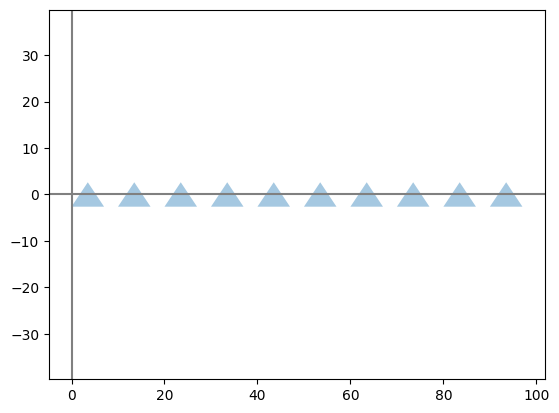

In [8]:
# NORMAL
polygons = gen_triangle(num_shapes=10)
draw_polygons(polygons)

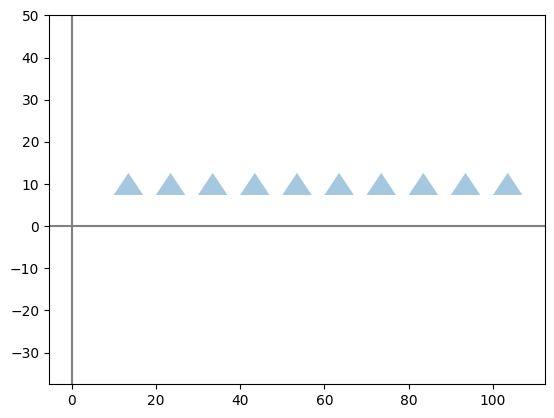

In [9]:
polygons = gen_triangle(num_shapes=10)
translated_polygons = tr_translate(polygons, 10, 10)
draw_polygons(translated_polygons)

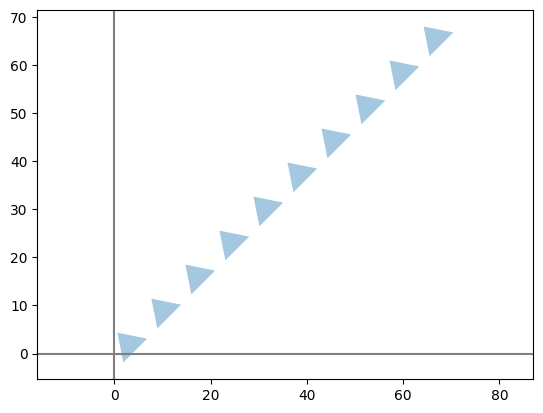

In [10]:
polygons = gen_triangle(num_shapes=10)
rotated_polygons = tr_rotate(polygons, math.radians(45))
draw_polygons(rotated_polygons)

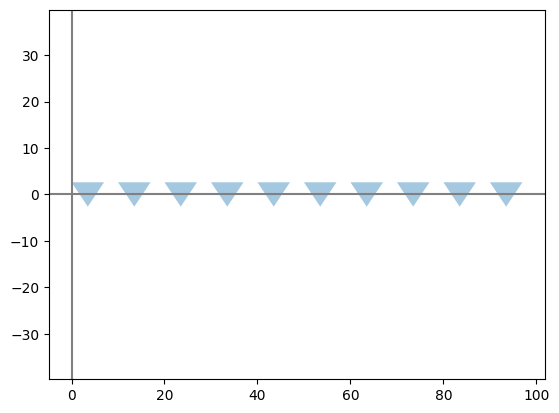

In [11]:
polygons = gen_triangle(num_shapes=10)
symmetric_x_polygons = tr_symmetry(polygons, axis='y')
draw_polygons(symmetric_x_polygons)

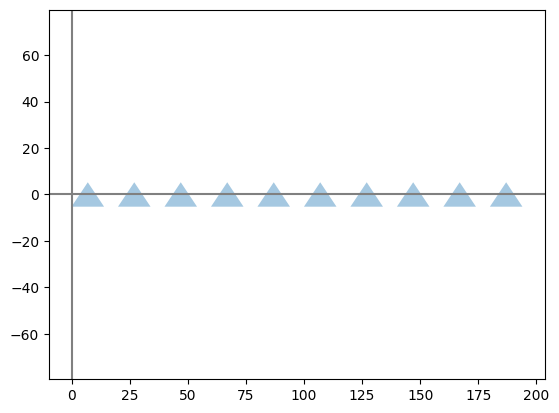

In [12]:
polygons = gen_triangle(num_shapes=10)
homothety_polygons = tr_homothety(polygons, 2)
draw_polygons(homothety_polygons)

# #4

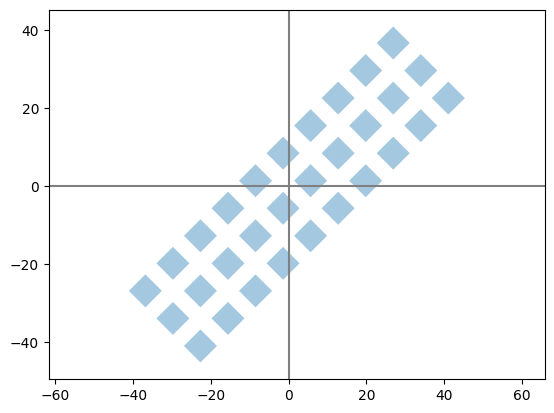

In [13]:
def get_4_1_original_three_lines():
    return  (gen_rectangle(start=(0, -10), num_shapes=10) +
             gen_rectangle(start=(0, 0), num_shapes=10) +
             gen_rectangle(start=(0, 10), num_shapes=10))

def get_4_1_full():
    return tr_rotate(tr_translate(get_4_1_original_three_lines(), dx=-48, dy=-3), math.radians(45))

draw_polygons(get_4_1_full(), draw_axes=True)

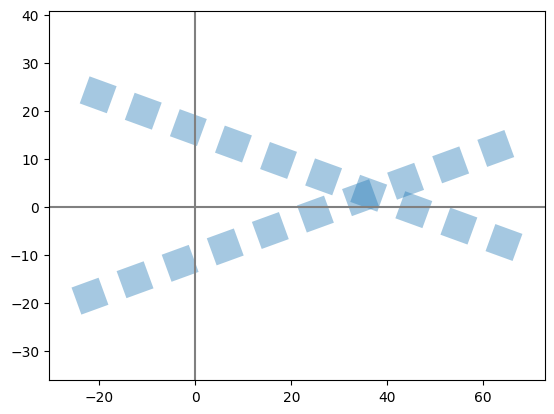

In [14]:
def get_4_2_full():
    return (
    tr_rotate(gen_rectangle(start=(-30, -10), num_shapes=10), math.radians(20)) + # lower
    tr_rotate(gen_rectangle(start=(-30, 15), num_shapes=10), math.radians(-20)) # upper
    )

draw_polygons(get_4_2_full(), draw_axes=True)

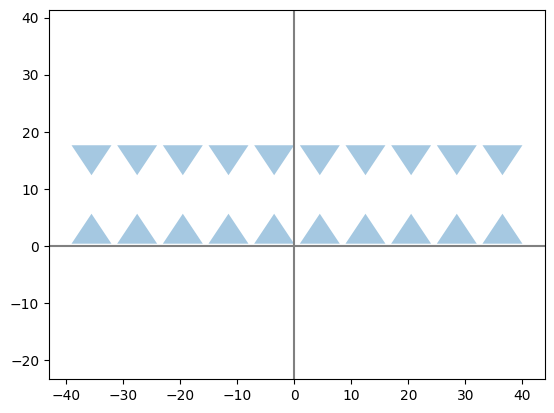

In [15]:
def get_4_3_main_shape():
    return tr_translate(gen_triangle(start=(-39, 0), step=(8, 0), num_shapes=10), 0, 0)

def get_4_3_full():
    return (
        tr_translate(get_4_3_main_shape(), dy=3) +
        tr_translate(tr_symmetry(get_4_3_main_shape(), axis='y'), dy=15)
    )

draw_polygons(get_4_3_full(), draw_axes=True)

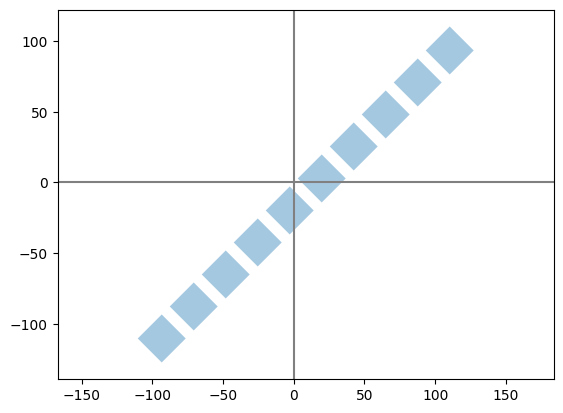

In [16]:
# ТЕСТЫ ТЕСТЫ ТЕСТЫ ТЕСТЫ ТЕСТЫ ТЕСТЫ ТЕСТЫ ТЕСТЫ

def get_4_4_0_main_shape():
    return tr_rotate(gen_rectangle(start=(-39, -3), step=(8, 0), num_shapes=10), angle=math.pi/4)

draw_polygons(tr_homothety(get_4_4_0_main_shape(), scale=4, origin=(0, 0)), draw_axes=True)

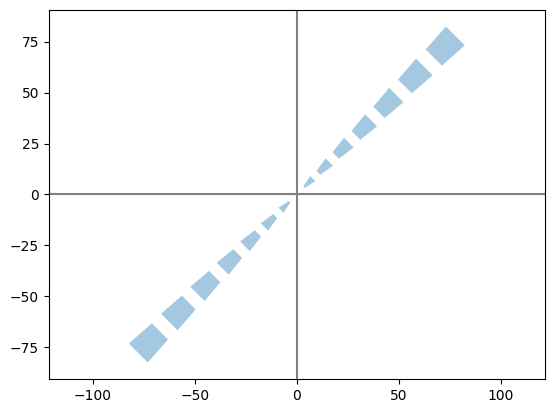

In [17]:
def gen_those_shapes(start=(0, 0), step=(10, 0), num_shapes=4):
    x, y = start
    size = 6  # side
    multiplier = 2.5
    link = 0.5
    result = []
    for i in range(num_shapes):
        #              left bottom                                   right bottom                     right top                                      left top
        vertices = [(x, y+1*multiplier - size/2), (size + x, y+1*multiplier*link - size/2), (size + x, size + y-1*multiplier*link - size/2), (x, size + y-1*multiplier - size/2)]
        result.append(Polygon(vertices, closed=True, color='blue'))
        x += step[0]
        y += step[1]
        step = (step[0] + 2, 0)
        size += 1.5
        multiplier /= 1.05
    return result

def get_4_4_main_shape():
    return (
        tr_rotate(tr_translate(gen_those_shapes(num_shapes=7), dx=5), angle=math.pi/4) +
        tr_rotate(tr_translate(gen_those_shapes(num_shapes=7), dx=5), angle=math.pi/4*5)
    )

def get_4_4_full():
    return tr_test(get_4_4_main_shape(), angle=math.pi/4)

draw_polygons(get_4_4_full(), draw_axes=True)

# #5

In [18]:
import matplotlib

def is_convex(polygon):
    vertices = polygon.get_xy()
    n = len(vertices)
    
    for i in range(n):
        v1 = vertices[i] - vertices[(i-1)%n]
        v2 = vertices[(i+1)%n] - vertices[i]
        
        if np.cross(v1, v2) < 0:
            # print('removed a polygon')
            return False
    # print('a polygon is fine')
    return True

def flt_convex_polygon_simple(polygons: list[matplotlib.patches.Polygon]):
    return [p for p in polygons if is_convex(p)]

In [33]:
def has_angle_point_simple(polygon: matplotlib.patches.Polygon, point):
    vertices = polygon.get_xy()
    for x, y in vertices:
        if x == point[0] and y == point[1]:
            return True
    return False
    # return point in vertices

def flt_angle_point_simple(polygons: list[matplotlib.patches.Polygon], point):
    # for p in polygons:
    #     print(p.get_xy(), point, has_angle_point_simple(p, point))
    return [p for p in polygons if has_angle_point_simple(p, point)]

# #6

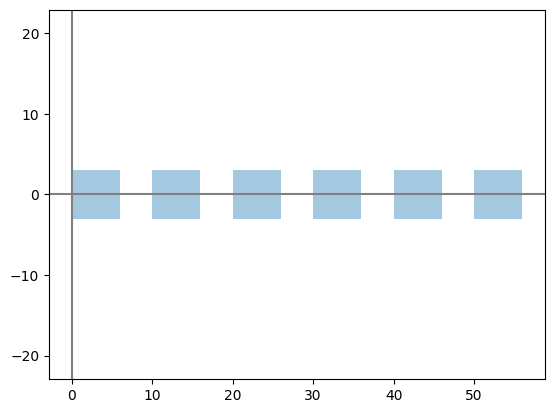

In [34]:
# Выпуклость
draw_polygons(flt_convex_polygon_simple(gen_rectangle(num_shapes=6) + [Polygon([[0,0], [0,1], [2, 0], [-1, -1]], closed=True)]))

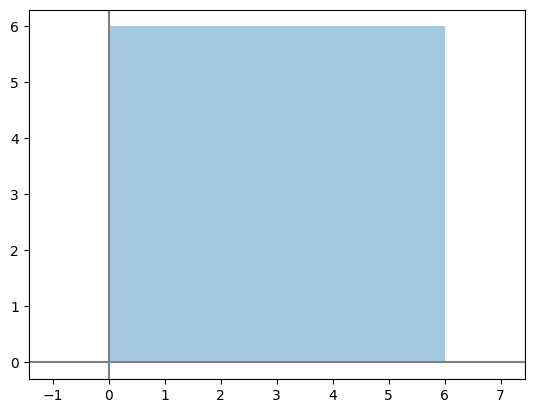

In [35]:
# Наличие точки в полигонах
draw_polygons(flt_angle_point_simple(gen_rectangle(num_shapes=5, start=(0, 3)), point=(0, 0)))

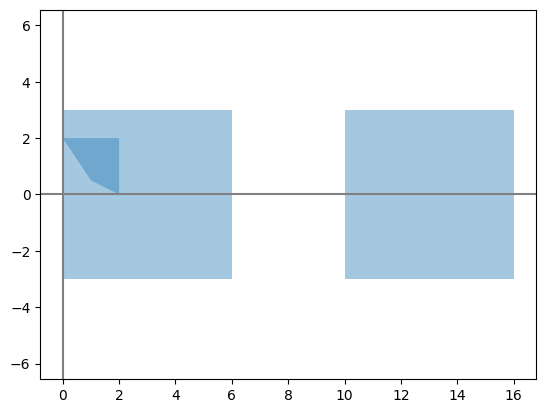

False
True
True
[[<matplotlib.patches.Polygon object at 0x000001BCF1B629E0>, <matplotlib.patches.Polygon object at 0x000001BCF1E47BB0>]]
[<matplotlib.patches.Polygon object at 0x000001BCF1B629E0>, <matplotlib.patches.Polygon object at 0x000001BCF1E47BB0>]


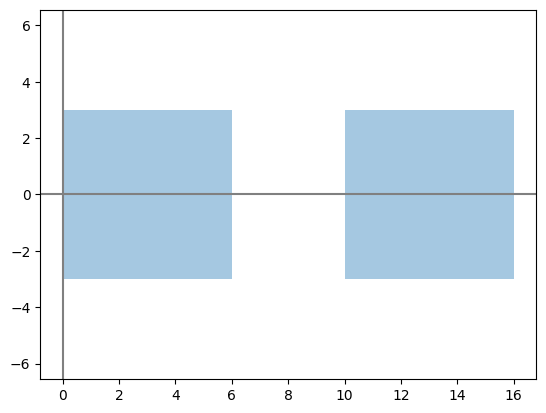

In [53]:
def flt_convex_polygon():
    def decorator(func):
        def wrapper(*args, **kwargs):
            filtered_args = []
            for arg in args:
                if isinstance(arg, list):
                    sub_list = []
                    for arg2 in arg:
                        print(is_convex(arg2))
                        if is_convex(arg2):
                            sub_list.append(arg2)
                    filtered_args.append(sub_list)
                else:
                    filtered_args.append(is_convex(arg))
            print(filtered_args)
            return func(*filtered_args, **kwargs)
        return wrapper
    return decorator

def flt_angle_point(point):
    def decorator(func):
        def wrapper(*args, **kwargs):
            filtered_args = []
            for arg in args:
                if isinstance(arg, list):
                    sub_list = []
                    for arg2 in arg:
                        # print(arg2.get_xy(), has_angle_point(arg2, point=point))
                        if has_angle_point_simple(arg2, point=point):
                            sub_list.append(arg2)
                    filtered_args.append(sub_list)
                else:
                    filtered_args.append(has_angle_point_simple(arg, point=point))
            # print(filtered_args)
            return func(*filtered_args, **kwargs)
        return wrapper
    return decorator

# @flt_angle_point(point=(0, 0))
@flt_convex_polygon()
def process_polygons(polygons):
    return polygons

polygons = [Polygon([(1, 0.5), (0, 2), (2, 2), (2, 0)])] + gen_rectangle(num_shapes=2)

draw_polygons(polygons)
pols = process_polygons(polygons)
print(pols)
draw_polygons(pols)